# OASIS INFOBYTE DATASCIENCE INTERNSHIP

## TASK 5

## Muhammad Ahsan

## Sales Prediction

## Importing libraries

In [57]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

## Loading the dataset

In [58]:
# Importing the dataset as a dataframe
data = pd.read_csv('Advertising.csv')

In [59]:
# Displaying the dataframe
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [60]:
# Finding size of dataframe
data.shape

(200, 5)

In [61]:
# Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [62]:
# We don't need the 1st column so let's drop that
data = data.iloc[:,1:]

In [63]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [64]:
# Perform any necessary data cleaning or handling of missing values.
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Visualization of data

In [65]:
# Printing summary statistics of the dataframe
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [66]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\shaik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


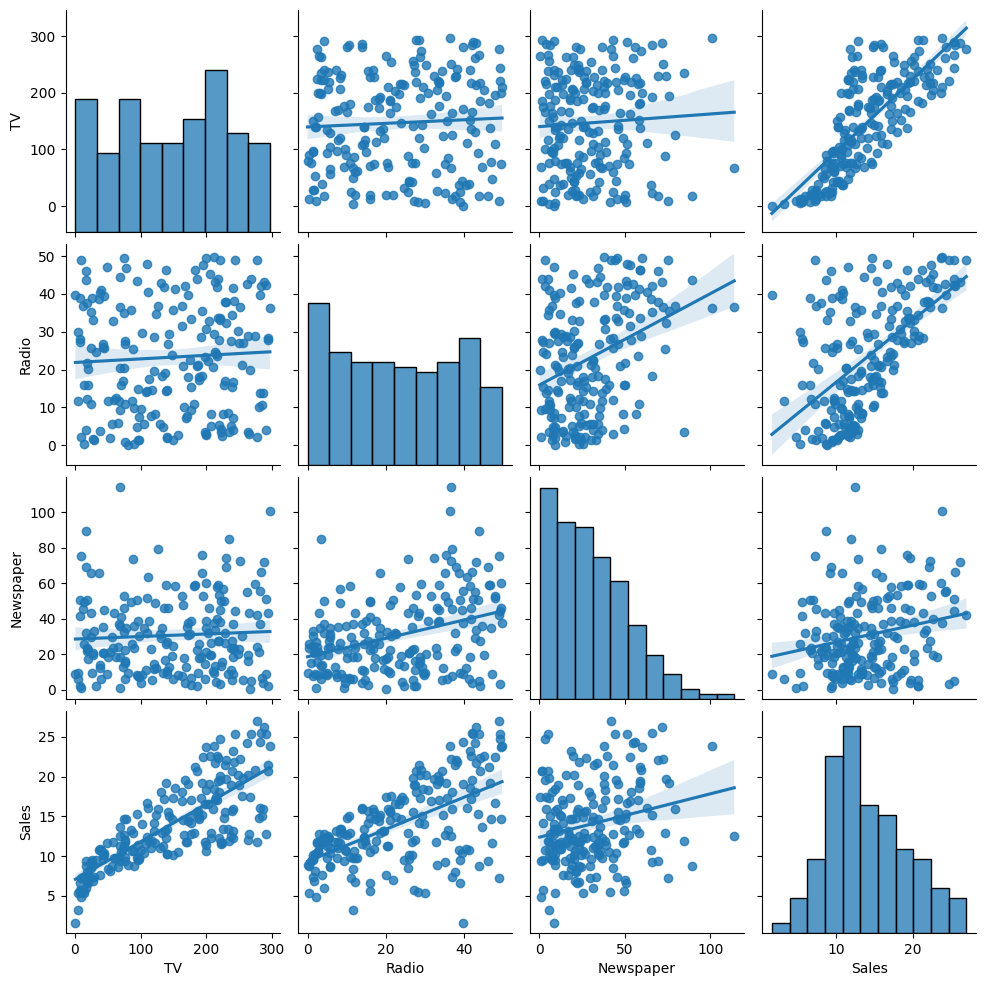

In [67]:
# Explore the dataset by visualizing the relationships between different features.
sns.pairplot(data, kind="reg");

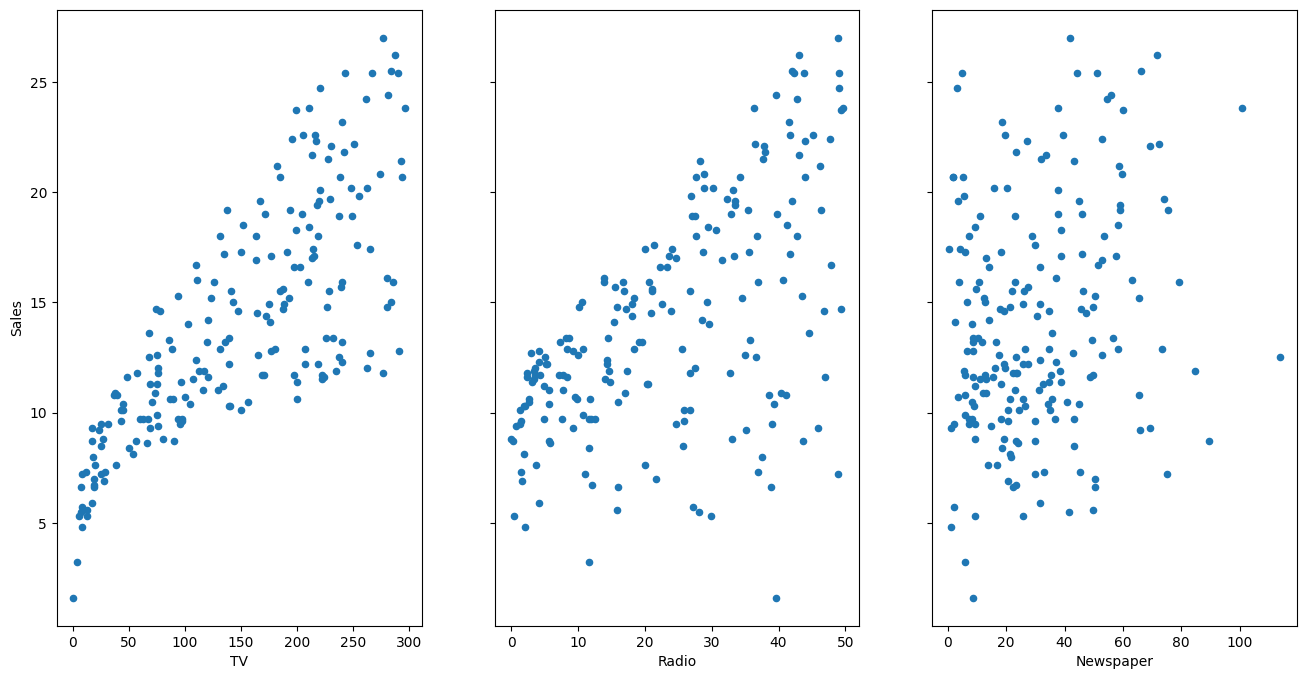

In [68]:
fig,axs= plt.subplots(1,3,sharey=True)
data.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(16,8))
data.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
data.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))
plt.show()

In [69]:
# Removing the outlier from newspaper
data = data[data['Newspaper']<=90]
data.shape

(198, 4)

In [70]:
# Correlation of data
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


## Preprocess the Data

In [71]:
# Separating input and output data
X = data.drop(columns=['Sales'])
y = data['Sales'] 

In [72]:
# Remove the sales column from the table
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [73]:
# Showing the encoded variable sales
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [74]:
# splitting and training the dataset
from sklearn.model_selection import train_test_split

## Split the Data

In [75]:
# Splitting data into training and testing sets 
# train - 80%
# test - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
X_train.tail()

,TV,Radio,Newspaper
68,237.4,27.5,11.0
194,149.7,35.6,6.0
119,19.4,16.0,22.3
48,227.2,15.8,49.9
174,222.4,3.4,13.1


In [77]:
y_test.tail()

196     9.7
128    24.7
4      12.9
67     13.4
125    10.6
Name: Sales, dtype: float64

In [78]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Applying ML Models

In [79]:
# Extract the best-performing model along with any necessary preprocessing components
# Also scaling the numeric variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
# Importing libraries for the regressor models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [81]:
# Creating an instance of the ML models
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
kn = KNeighborsRegressor()

In [82]:
# Training the models with training dataset
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
kn.fit(X_train,y_train)

KNeighborsRegressor()

## Evaluating ML Models

In [83]:
# Importing libraries to check the regression parameters
from sklearn.metrics import r2_score

In [84]:
# Evaluation of the trained models
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
kn_pred = kn.predict(X_test)

In [85]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor()]
models_names = ["Linear Regression","Decision Tree Regressor","Random Forest Regressor","K-Nearest Neighbours Regressor"]
accuracy = []
for model in range (len(models)):
    model=models[model]
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    accuracy.append((model.score(X_test,y_test))*100)
d = pd.DataFrame({'Modelling Name':models_names,"Accuracy":accuracy})

In [86]:
d

,Modelling Name,Accuracy
0,Linear Regression,90.989464
1,Decision Tree Regressor,95.012314
2,Random Forest Regressor,97.818343
3,K-Nearest Neighbours Regressor,96.169420


In [87]:
print("Linear Regression:")
print("Accuracy:", r2_score(y_test,lr_pred)*100)

Linear Regression:
Accuracy: 90.98946359000558


In [88]:
print("Decision Tree Regressor:")
print("Accuracy:", r2_score(y_test,dt_pred)*100)

Decision Tree Regressor:
Accuracy: 95.22071320666988


In [89]:
print("Random Forest Regressor:")
print("Accuracy:", r2_score(y_test,rf_pred)*100)

Random Forest Regressor:
Accuracy: 97.89136625545659


In [90]:
print("K-Nearest Neighbours Regressor:")
print("Accuracy:", r2_score(y_test,kn_pred)*100)

K-Nearest Neighbours Regressor:
Accuracy: 96.16942015951334


In [92]:
# We need TV, radio, and newspaper to predict the advertising budget
new_tv = float(input("TV Value : "))
new_radio = float(input("Radio Value : "))
new_newspaper = float(input("Newspaper value : "))

In [93]:
# Converting the input values to a dataframe
new_value = pd.DataFrame([[new_tv, new_radio, new_newspaper]])

In [94]:
#scaling the user input
new_value_scaled = scaler.transform(new_value)

c:\Users\shaik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [95]:
# Predicting the output for the new value
prediction = rf.predict(new_value_scaled)

In [96]:
# Prediction on the advertising budget for TV, radio, and newspaper
prediction[0]

3.126999999999997

## *Model Deployment*

In [ ]:
# Model is PREPARED.
# Now we have to host the website, for that pipeling needs to be done
# The text which we will get, has to be scaled first, then apply the algorithm and decode back

In [ ]:
# We will pickle 2 files
import pickle
pickle.dump(scaler, open('scalers.pkl', 'wb'))
pickle.dump(rf,open('model.pkl','wb'))

In [ ]:
import pickle

# Save the scaler object to "scaler.pkl" (recreating the file)
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

In [ ]:
import pickle

# Load the scaler object from "scaler.pkl"
with open("scaler.pkl", "rb") as file:
    scaler = pickle.load(file)


## Author
Muhammad Ahsan